In [2]:
#import os pacotes utilizados
import numpy as np
import pandas as pd

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [3]:
#import os dataframe do IFRN
df_AcompanhamentoEncaminhamento = pd.read_json('dados/AcompanhamentoEncaminhamento.json')
df_Aluno = pd.read_json('dados/Aluno.json')
df_BeneficioGovernoFederal = pd.read_json("dados/BeneficioGovernoFederal.json")
df_Caracterizacao = pd.read_json("dados/Caracterizacao.json")
df_CompanhiaDomiciliar = pd.read_json("dados/CompanhiaDomiciliar.json")
df_ContribuinteRendaFamiliar = pd.read_json("dados/ContribuinteRendaFamiliar.json")
df_CursoCampus = pd.read_json('dados/CursoCampus.json')
df_CursoFormacaoSuperior = pd.read_json('dados/CursoFormacaoSuperior.json')
df_Disciplina = pd.read_json("dados/Disciplina.json")
df_Encaminhamento = pd.read_json("dados/Encaminhamento.json")
df_EstadoCivil = pd.read_json("dados/EstadoCivil.json")
df_Idioma = pd.read_json("dados/Idioma.json")
df_MatriculaPeriodo = pd.read_json("dados/MatriculaPeriodo.json")
df_MeioTransporte = pd.read_json("dados/MeioTransporte.json")
df_NecessidadeEspecial = pd.read_json("dados/NecessidadeEspecial.json")
df_NivelEscolaridade = pd.read_json("dados/NivelEscolaridade.json")
df_Notas = pd.read_json("dados/Notas.json")
df_Professores = pd.read_json("dados/Professores.json")
df_Raca = pd.read_json("dados/Raca.json")
df_RazaoAfastamentoEducacional = pd.read_json("dados/RazaoAfastamentoEducacional.json")
df_SituacaoDisciplina = pd.read_json("dados/SituacaoDisciplina.json")
df_SituacaoMatricula = pd.read_json("dados/SituacaoMatricula.json")
df_SituacaoMatriculaPeriodo = pd.read_json("dados/SituacaoMatriculaPeriodo.json")
df_SituacaoTrabalho = pd.read_json("dados/SituacaoTrabalho.json")
df_TipoAcessoInternet = pd.read_json("dados/TipoAcessoInternet.json")
df_TipoAreaResidencial = pd.read_json("dados/TipoAreaResidencial.json")
df_TipoEscola = pd.read_json("dados/TipoEscola.json")
df_TipoImovelResidencial = pd.read_json("dados/TipoImovelResidencial.json")
df_TipoServicoSaude = pd.read_json("dados/TipoServicoSaude.json")
df_UnidadeOrganizacional = pd.read_json("dados/UnidadeOrganizacional.json")

In [20]:
#df_Alunos shape: (9451, 10)
print(df_Aluno.shape) 
dados = pd.merge(df_Aluno, df_CursoCampus, 
                 left_on="curso_campus_id", right_on="id", suffixes=["", "_curso_campus"])
dados = pd.merge(dados, df_UnidadeOrganizacional, 
                 left_on="diretoria__setor__uo_id", right_on="id", suffixes=["", "_unidade_organizacional"])
dados = pd.merge(dados, df_SituacaoMatricula, 
                 left_on="situacao_id", right_on="id", suffixes=["", "_situacao_matricula"])

#df_MatriculaPeriodo (18726, 24)
dados = pd.merge(dados, df_MatriculaPeriodo, 
                 left_on="id", right_on="aluno_id", suffixes=["", "_matricula_periodo"])
dados = pd.merge(dados, df_SituacaoMatriculaPeriodo, 
                 left_on="situacao_id_matricula_periodo", right_on="id", suffixes=["", "_situacao_matricula_periodo"])

#df_Notas (134985, 30)
dados = pd.merge(dados, df_Notas, 
                 left_on="id_matricula_periodo", right_on="matricula_periodo_id", suffixes=["", "_notas"])
dados = pd.merge(dados, df_Disciplina, 
                 left_on="disciplina_id", right_on="id", suffixes=["", "_disciplina"])

"""
#df_AcompanhamentoEncaminhamento (151452, 28)
dados = pd.merge(dados, df_AcompanhamentoEncaminhamento, how='left',
                 left_on="id", right_on="acompanhamento__aluno_id", suffixes=["", "_acompanhamento_encaminhamento"])
dados = pd.merge(dados, df_Encaminhamento, how='left',
                 left_on="encaminhamento_id", right_on="id", suffixes=["", "_encaminhamento"])
"""

print(dados.shape)
print(dados.head(2))
dados_all = dados

dados = dados[['id', 'ano_letivo__ano', 'cep', 'cidade__estado__nome', 
               'cidade__nome', 'pessoa_fisica__nascimento_data', 
               'pessoa_fisica__sexo', 'descricao_historico', 'sigla',
               'descricao', 
               'ano_letivo__ano_matricula_periodo', 'descricao_situacao_matricula_periodo',
               'media_final', 'percentual_frequencia', 'professores', 
               'descricao_historico_disciplina'
              ]]

print(dados.shape)
dados.head(2)


(9451, 10)
(134985, 33)
   ano_letivo__ano        cep cidade__estado__nome cidade__nome  \
0             2016  59067-400  RIO GRANDE DO NORTE        NATAL   
1             2015  59072-660  RIO GRANDE DO NORTE        NATAL   

   curso_campus_id            id  periodo_letivo  \
0       1891185269  496915657473               1   
1       1891185269  451421707629               1   

  pessoa_fisica__nascimento_data pessoa_fisica__sexo  situacao_id  \
0                     06/12/2001                   M    920915333   
1                     07/07/1999                   F    920915333   

                     descricao_historico  diretoria__setor__uo_id  \
0  Técnico de Nível Médio em Edificações                920915333   
1  Técnico de Nível Médio em Edificações                920915333   

   id_curso_campus  id_unidade_organizacional sigla    descricao  \
0       1891185269                  920915333  CNAT  Matriculado   
1       1891185269                  920915333  CNAT  Matriculado 

,id,ano_letivo__ano,cep,cidade__estado__nome,cidade__nome,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,descricao_historico,sigla,descricao,ano_letivo__ano_matricula_periodo,descricao_situacao_matricula_periodo,media_final,percentual_frequencia,professores,descricao_historico_disciplina
0,496915657473,2016,59067-400,RIO GRANDE DO NORTE,NATAL,06/12/2001,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2016,Aprovado,86,85.0,[1521],Língua Portuguesa e Literatura I(90H)
1,451421707629,2015,59072-660,RIO GRANDE DO NORTE,NATAL,07/07/1999,F,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,100,100.0,NaN,Língua Portuguesa e Literatura I(90H)


In [21]:
dados_all

,ano_letivo__ano,cep,cidade__estado__nome,cidade__nome,curso_campus_id,id,periodo_letivo,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,situacao_id,descricao_historico,diretoria__setor__uo_id,id_curso_campus,id_unidade_organizacional,sigla,descricao,id_situacao_matricula,aluno_id,ano_letivo__ano_matricula_periodo,id_matricula_periodo,periodo_letivo_matricula_periodo,situacao_id_matricula_periodo,descricao_situacao_matricula_periodo,id_situacao_matricula_periodo,disciplina_id,matricula_periodo_id,media_final,percentual_frequencia,professores,situacao_id_notas,ch_hora_relogio,descricao_historico_disciplina,id_disciplina
0,2016,59067-400,RIO GRANDE DO NORTE,NATAL,1891185269,496915657473,1,06/12/2001,M,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,496915657473,2016,1289149424613,1,948796653,Aprovado,948796653,9745353113,1289149424613,86,85.0,[1521],923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
1,2015,59072-660,RIO GRANDE DO NORTE,NATAL,1891185269,451421707629,1,07/07/1999,F,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,451421707629,2015,1008030439449,1,948796653,Aprovado,948796653,9745353113,1008030439449,100,100.0,NaN,923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
2,2015,59149-120,RIO GRANDE DO NORTE,PARNAMIRIM,1891185269,453365035633,1,04/06/1999,M,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,453365035633,2015,1010037894489,1,948796653,Aprovado,948796653,9745353113,1010037894489,96,97.0,NaN,923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
3,2016,59065-080,RIO GRANDE DO NORTE,NATAL,1891185269,495722336977,1,31/07/2001,M,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,495722336977,2016,1287956104117,1,948796653,Aprovado,948796653,9745353113,1287956104117,85,89.0,[1521],923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
4,2015,59020-100,RIO GRANDE DO NORTE,NATAL,1891185269,452344579321,1,03/08/2000,M,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,452344579321,2015,1008995133121,1,948796653,Aprovado,948796653,9745353113,1008995133121,95,97.0,NaN,923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
5,2016,59280-000,RIO GRANDE DO NORTE,MACAIBA,1891185269,497634995529,1,25/06/2000,M,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,497634995529,2016,1290827880077,1,948796653,Aprovado,948796653,9745353113,1290827880077,77,93.0,[1521],923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
6,2015,59068-310,RIO GRANDE DO NORTE,NATAL,1891185269,453443103329,1,05/05/1999,M,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,453443103329,2015,1010277673841,1,948796653,Aprovado,948796653,9745353113,1010277673841,79,99.0,NaN,923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
7,2015,59149-125,RIO GRANDE DO NORTE,PARNAMIRIM,1891185269,453175442657,1,11/02/1999,F,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,453175442657,2015,1009976555585,1,948796653,Aprovado,948796653,9745353113,1009976555585,87,98.0,NaN,923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
8,2015,59025-160,RIO GRANDE DO NORTE,NATAL,1891185269,453049976717,1,12/05/1999,F,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,453049976717,2015,1009558335785,1,948796653,Aprovado,948796653,9745353113,1009558335785,77,69.0,NaN,923703465,90,Língua Portuguesa e Literatura I(90H),9745353113
9,2016,59143-135,RIO GRANDE DO NORTE,PARNAMIRIM,1891185269,499048578453,1,13/04/2001,F,920915333,Técnico de Nível Médio em Edificações,920915333,1891185269,920915333,CNAT,Matriculado,920915333,4990

In [76]:
df1 = dados_all[['id', 'media_final', 'descricao_historico_disciplina']]
df2 = pd.pivot_table(df1,index=["id"], values=["media_final"], columns=["descricao_historico_disciplina"])

df_corr = df2.corr()

In [77]:
df_corr.shape
df_corr_ok = df_corr.fillna(0)

df_corr_ok[0:2]

media_final  \
descricao_historico_disciplina                          Acionamento Eletrônico   
            descricao_historico_disciplina                                       
media_final Acionamento Eletrônico                                         0.0   
            Administração de Empresas Cooperativistas I                    0.0   

                                                                                                     \
descricao_historico_disciplina                          Administração de Empresas Cooperativistas I   
            descricao_historico_disciplina                                                            
media_final Acionamento Eletrônico                                                              0.0   
            Administração de Empresas Cooperativistas I                                         0.0   

                                                                                                      \
descricao_historico_disciplina                          Administração de Empresas Cooperativistas II   
            descricao_historico_disciplina                                                             
media_final Acionamento Eletrônico                                                               0.0   
            Administração de Empresas Cooperativistas I                                          0.0   

                                                                           \
descricao_historico_disciplina                          Agricultura Geral   
            descricao_historico_disciplina                                  
media_final Acionamento Eletrônico                                    0.0   
            Administração de Empresas Cooperativistas I               0.0   

                                                                      \
descricao_historico_disciplina                          Agroecologia   
            descricao_historico_disciplina                             
media_final Acionamento Eletrônico                               0.0   
            Administração de Empresas Cooperativistas I          0.0   

                                                                            \
descricao_historico_disciplina                          Agroecologia Geral   
            descricao_historico_disciplina                                   
media_final Acionamento Eletrônico                                     0.0   
            Administração de Empresas Cooperativistas I                0.0   

                                                                                           \
descricao_historico_disciplina                          Anatomia e Fisiologia Animal(45H)   
            descricao_historico_disciplina                                                  
media_final Acionamento Eletrônico                                                    0.0   
            Administração de Empresas Cooperativistas I                               0.0   

                                                                                           \
descricao_historico_disciplina                          Anatomia e Fisiologia Animal(60H)   
            descricao_historico_disciplina                                                  
media_final Acionamento Eletrônico                                                    0.0   
            Administração de Empresas Cooperativistas I                               0.0   

                                                                                           \
descricao_historico_disciplina                          Análise Química dos Minerais(45H)   
            descricao_historico_disciplina                                                  
media_final Acionamento Eletrônico                                                    0.0   
            Administração de Empresas Cooperativistas I                               0.0   

                                                                                \
d

In [79]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

DF_dism = df_corr_ok   # distance matrix

linkage = hc.linkage(sp.distance.squareform(DF_dism), method='average')

mpl.rc("figure", figsize=(45, 10))
fig = plt.figure()

cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(DF_dism, row_linkage=linkage, col_linkage=linkage, cmap=cmap)

ValueError: Distance matrix 'X' diagonal must be zero.

In [4]:
#exibir distribuição de notas por disciplina
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


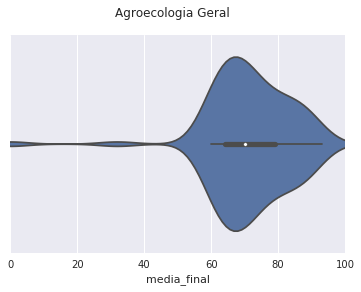

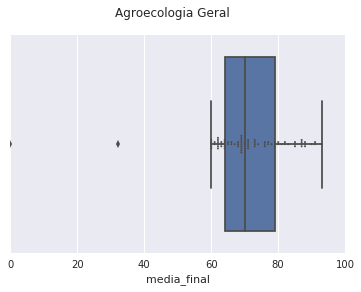

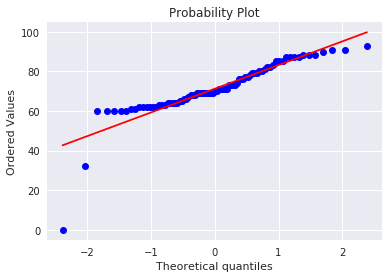

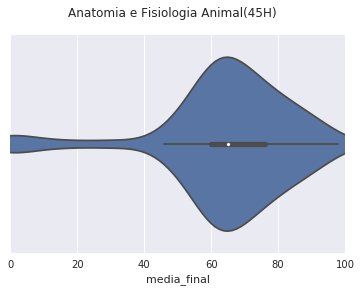

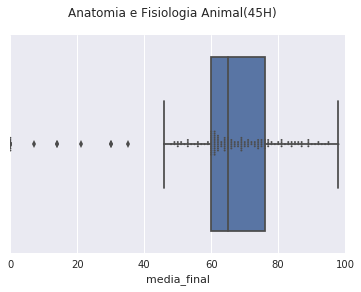

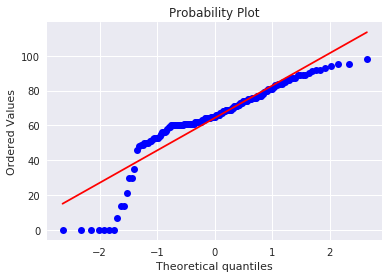

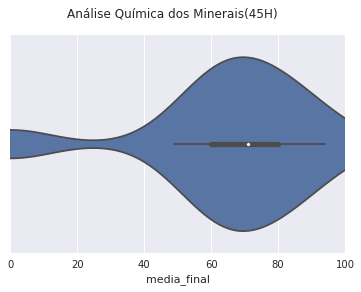

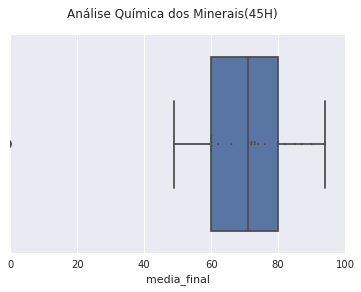

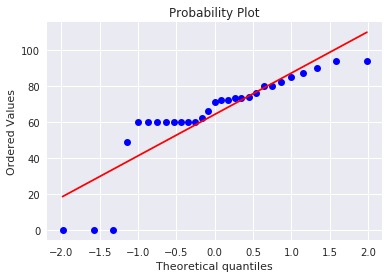

In [5]:
#gerando graficos
%matplotlib inline
#plt.close('all')

cnt = 0

#array para guardar o R o qual representa o erro do ajuste com a Normal. Quanto mais próximo de 1, mais próximo está da normal
r = []
i = []

#loop sobre cada disciplina
for index1, group1 in dados.groupby(['descricao_historico_disciplina']):    
    
    #restrição mínima de 10 instâncias  
    if dados[dados.descricao_historico_disciplina == index1]['media_final'].count() < 10:
        continue
    
    
    fig = plt.figure()
    sns.plt.suptitle(index1)
    #sns.violinplot(dados[dados.descricao_historico_disciplina == index1]['media_final'], inner="points")
    #sns.violinplot(dados[dados.descricao_historico_disciplina == index1]['media_final'], inner="quart")
    g = sns.violinplot(dados[dados.descricao_historico_disciplina == index1]['media_final'])
    g.set(xlim=(0, 100))
    
    fig = plt.figure()
    sns.plt.suptitle(index1)
    g = sns.boxplot(dados[dados.descricao_historico_disciplina == index1]['media_final'])
    sns.swarmplot(dados[dados.descricao_historico_disciplina == index1]['media_final'], size=2, color=".3", linewidth=0)
    g.set(xlim=(0, 100))
    
    #fig = plt.figure()
    #sns.plt.suptitle(index1)
    #dados[dados.descricao_historico_disciplina == index1]['media_final'].plot(kind='box')
    #fig.savefig("boxplot.pdf", dpi=600)
        
    fig = plt.figure()
    o, res = stats.probplot(dados[dados.descricao_historico_disciplina == index1]['media_final'], plot=plt)    
    r.append(res[2])
    i.append(index1)
    #fig.savefig("qq1.pdf", dpi=600)
    
    cnt += 1
    if cnt == 3:
        break

df = pd.DataFrame(data=r, index=i)

#fig = plt.figure()
#df.plot.bar(title='Ajuste R')

In [ ]:
#dendograma com disciplinas correlacionadas
import numpy as np;
import seaborn as sns;
import pandas as pd
#from scipy import stats
import matplotlib.pyplot as plt

#from scipy.spatial import distance
#from scipy.cluster import hierarchy

import scipy.spatial as sp, scipy.cluster.hierarchy as hc

"""
correlation_matrix = mcorr1;

Z = hac.linkage(correlation_matrix, 'single', 'correlation')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
"""
"""
corr = mcorr1 

corr_condensed = hac.distance.squareform(corr) # convert to condensed
z = hac.linkage(corr_condensed, method='average')
dendrogram = hac.dendrogram(z, labels=corr.columns)
"""
DF = df_Caracterizacao[cmp_sel]
#DF_corr = DF.T.corr()
DF_corr = DF.corr()
DF_dism = 1 - DF_corr   # distance matrix

#print(DF_dism.isnull().any())
#print(DF_dism.shape)
#sns.heatmap(DF_dism, square=True)

linkage = hc.linkage(sp.distance.squareform(DF_dism), method='average')

mpl.rc("figure", figsize=(45, 10))
fig = plt.figure()

cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(DF_dism, row_linkage=linkage, col_linkage=linkage, cmap=cmap)

In [13]:
dados

,id,ano_letivo__ano,cep,cidade__estado__nome,cidade__nome,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,descricao_historico,sigla,descricao,ano_letivo__ano_matricula_periodo,descricao_situacao_matricula_periodo,media_final,percentual_frequencia,professores,descricao_historico_disciplina
0,496915657473,2016,59067-400,RIO GRANDE DO NORTE,NATAL,06/12/2001,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2016,Aprovado,86,85.0,[1521],Língua Portuguesa e Literatura I(90H)
1,451421707629,2015,59072-660,RIO GRANDE DO NORTE,NATAL,07/07/1999,F,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,100,100.0,NaN,Língua Portuguesa e Literatura I(90H)
2,453365035633,2015,59149-120,RIO GRANDE DO NORTE,PARNAMIRIM,04/06/1999,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,96,97.0,NaN,Língua Portuguesa e Literatura I(90H)
3,495722336977,2016,59065-080,RIO GRANDE DO NORTE,NATAL,31/07/2001,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2016,Aprovado,85,89.0,[1521],Língua Portuguesa e Literatura I(90H)
4,452344579321,2015,59020-100,RIO GRANDE DO NORTE,NATAL,03/08/2000,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,95,97.0,NaN,Língua Portuguesa e Literatura I(90H)
5,497634995529,2016,59280-000,RIO GRANDE DO NORTE,MACAIBA,25/06/2000,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2016,Aprovado,77,93.0,[1521],Língua Portuguesa e Literatura I(90H)
6,453443103329,2015,59068-310,RIO GRANDE DO NORTE,NATAL,05/05/1999,M,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,79,99.0,NaN,Língua Portuguesa e Literatura I(90H)
7,453175442657,2015,59149-125,RIO GRANDE DO NORTE,PARNAMIRIM,11/02/1999,F,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,87,98.0,NaN,Língua Portuguesa e Literatura I(90H)
8,453049976717,2015,59025-160,RIO GRANDE DO NORTE,NATAL,12/05/1999,F,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2015,Aprovado,77,69.0,NaN,Língua Portuguesa e Literatura I(90H)
9,499048578453,2016,59143-135,RIO GRANDE DO NORTE,PARNAMIRIM,13/04/2001,F,Técnico de Nível Médio em Edificações,CNAT,Matriculado,2016,Aprovado,77,100.0,"[3376, 112]",Língua Portuguesa e Literatura I(90H)


In [ ]:
"""
é verificado par a par por disciplina e classe se elas possuem diferença estatística significativa 
"""
#test de normalidade
#stats.normaltest

#test se duas amostras são da mesma distribuição
df_ind = pd.DataFrame()
#stats.ttest_ind(a,b)

#para cada disciplina realizar o teste
for index1, group1 in dados.groupby(['descricao_historico_disciplina']):       
    arr_test = []

    mf1 = dados[(dados.descricao_historico_disciplina == index1)]['media_final']
    
    for index2, group2 in dados.groupby(['descricao_historico_disciplina']):        
        mf2 = dados[(dados.descricao_historico_disciplina == index2)]['media_final']
    
        #This is a two-sided test for the null hypothesis that 2 independent 
        #samples have identical average (expected) values
        arr_test.append( stats.ttest_ind(mf1,mf2, equal_var=False).pvalue )
        
        if (index1 == index2):
            v0 = stats.ttest_ind(mf1,mf2, equal_var=False)
            print("------------------------------------------")
            print(v0)
            if (np.isnan(v0.pvalue)):
                print("OLHA ISSO")
                print(mf1.head)
            
        
    #salvando os testes
    df_ind[index1] = arr_test
    #break

/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
OLHA ISSO
<bound method NDFrame.head of 134750    66
Name: media_final, dtype: int64>
------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
OLHA ISSO
<bound method NDFrame.head of 134778    80
Name: media_final, dtype: int64>
------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
OLHA ISSO
<bound method NDFrame.head of 134781    69
Name: media_final, dtype: int64>
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
OLHA ISSO
<bound method NDFrame.head of 134877    65
N

In [ ]:
"""
é mostrado o resultado a partir do heatmap
"""
#grafico de testes
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind)